In [49]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [50]:
df = pd.read_csv('spam.csv', encoding=('ISO-8859-1'))

In [51]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [52]:
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

In [53]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [54]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

In [55]:
df['text'] = df['text'].apply(clean_text)

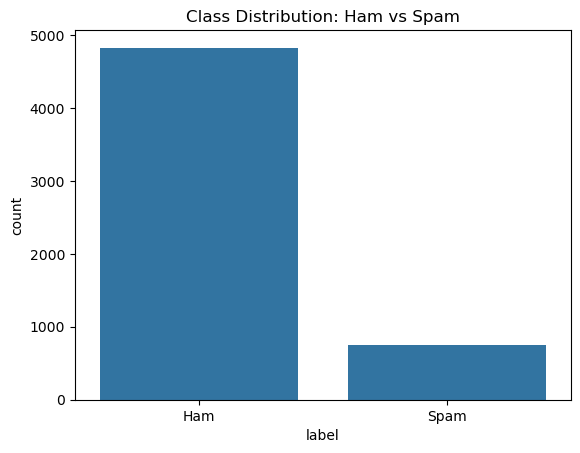

In [56]:
sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title('Class Distribution: Ham vs Spam')
plt.show()

In [57]:
spam_words = ' '.join(df[df['label'] == 1]['text'])

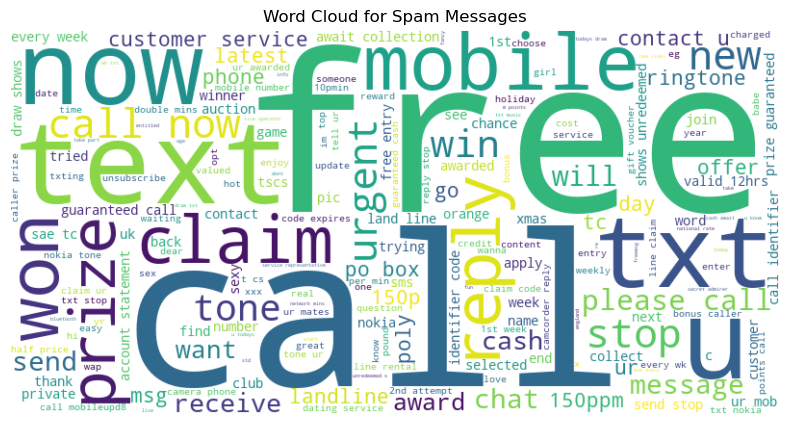

In [58]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [60]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [61]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

In [62]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)

In [63]:
print("\nNaive Bayes Results: ")
print("\nAccuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Results: 

Accuracy: 0.967713004484305
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [64]:
print("\nSupport Vector Machine Results: ")
print("\nAccuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


Support Vector Machine Results: 

Accuracy: 0.9802690582959641
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



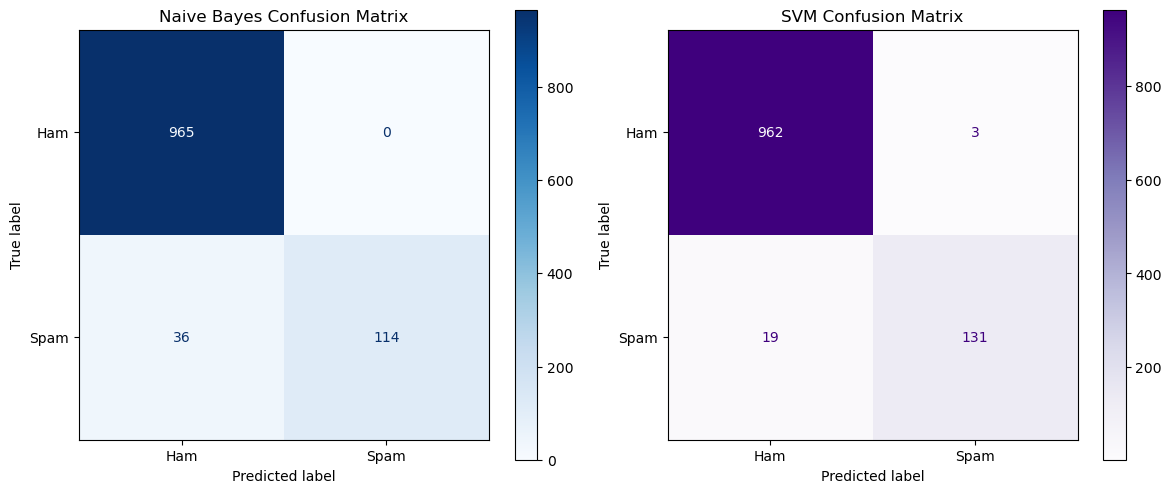

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

nb_cm = confusion_matrix(y_test, nb_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

ConfusionMatrixDisplay(nb_cm, display_labels=['Ham', 'Spam']).plot(ax=ax[0], cmap='Blues')
ax[0].set_title("Naive Bayes Confusion Matrix")

ConfusionMatrixDisplay(svm_cm, display_labels=['Ham', 'Spam']).plot(ax=ax[1], cmap='Purples')
ax[1].set_title("SVM Confusion Matrix")

plt.tight_layout()
plt.show()